In [29]:
import itertools 
import copy

import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from pandas.tseries.offsets import *
import statsmodels.api as sm

df = []

df.append(pd.read_csv("Images_Russia.csv", sep=";",index_col="Datetime"))
df.append(pd.read_csv("Weather_Russia.csv", sep=";",index_col="Datetime"))

df[0].shape, df[0][:2]

((186, 2),             Monthly  Average daily
 Datetime                          
 2008-05-01  6608910         717430
 2008-06-01  6362910         679620)

In [30]:
for i in xrange(len(df)):
    df[i] = df[i][[0]].copy()
    df[i].drop_duplicates(inplace=True)
    print df[i].shape, df[i][:1]    

(93, 1)             Monthly
Datetime           
2008-05-01  6608910
(93, 1)             Monthly
Datetime           
2008-05-01  4510200


<IPython.core.display.Javascript object>


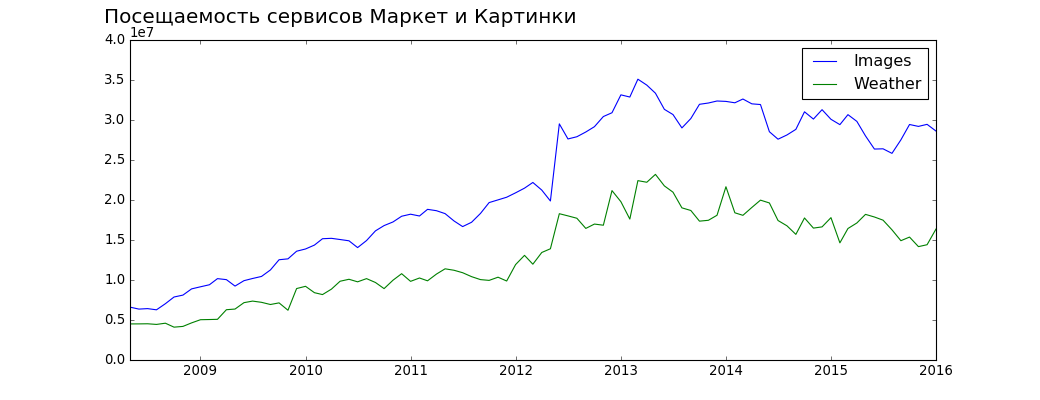

In [31]:
date_ranges = [] 

for i in xrange(len(df)):
    date_ranges.append(pd.date_range(df[i].index.tolist()[0], df[i].index.tolist()[-1], freq='MS'))    
    
for i in xrange(len(df)):
    df[i].index = date_ranges[i]
    
f = plt.figure(figsize=(13, 5), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)

plt.suptitle(u'Посещаемость сервисов Маркет и Картинки', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=18)
img, = plt.plot(df[0], label='Images')
wtr, = plt.plot(df[1], label='Weather')
plt.legend(handles=[img, wtr])

In [32]:
date_ranges[i][21-12] == date_ranges[i][21]  - DateOffset(months=12)

True

In [33]:
df[0].index.tolist()[21-12] == date_ranges[i][21]  - DateOffset(months=12)

True

In [34]:
next_months = []

for i in xrange(len(df)):
    next_months.append([])
    next_months[i].extend(itertools.repeat(np.nan, 12))    
    for j in list(xrange(date_ranges[i].shape[0]))[12:]:
        next_months[i].append(df[i].iloc[j-12]['Monthly']) 
    df[i]['Prev-year'] = next_months[i]
    
df[0][:13]

,Monthly,Prev-year
2008-05-01,6608910,NaN
2008-06-01,6362910,NaN
2008-07-01,6423440,NaN
2008-08-01,6273210,NaN
2008-09-01,7038170,NaN
2008-10-01,7873560,NaN
2008-11-01,8112760,NaN
2008-12-01,8888870,NaN
2009-01-01,9151460,NaN
2009-02-01,9405490,NaN


In [35]:
# previous_months=[]
# for i in xrange(len(df)):
#     previous_months.append([])
#     for j in xrange(date_ranges[i].shape[0]):
#         previous_months[i].append(date_ranges[i][j] - DateOffset(months=12))

for i in xrange(len(df)):
    prev = df[i]['Monthly'].tolist()[:-1]
    prev.insert(0,np.nan)
    df[i]["Previous"] = prev

diffs = []

for i in xrange(len(df)):              
    df[i]["Current-Previous-Diff"]=df[i]['Monthly'] - df[i]['Previous']
    df[i]["Current-Previous-%"]=df[i]['Monthly'] / df[i]['Previous']
    df[i]["Current-Prev-Year-Diff"]=df[i]['Monthly'] - df[i]['Prev-year']
    df[i]["Current-Prev-Year-%"]=df[i]['Monthly'] / df[i]['Prev-year']
    

print df[0][:13]

             Monthly  Prev-year  Previous  Current-Previous-Diff  \
2008-05-01   6608910        NaN       NaN                    NaN   
2008-06-01   6362910        NaN   6608910                -246000   
2008-07-01   6423440        NaN   6362910                  60530   
2008-08-01   6273210        NaN   6423440                -150230   
2008-09-01   7038170        NaN   6273210                 764960   
2008-10-01   7873560        NaN   7038170                 835390   
2008-11-01   8112760        NaN   7873560                 239200   
2008-12-01   8888870        NaN   8112760                 776110   
2009-01-01   9151460        NaN   8888870                 262590   
2009-02-01   9405490        NaN   9151460                 254030   
2009-03-01  10170730        NaN   9405490                 765240   
2009-04-01  10045830        NaN  10170730                -124900   
2009-05-01   9239910    6608910  10045830                -805920   

            Current-Previous-%  Current-Prev-Ye

<IPython.core.display.Javascript object>


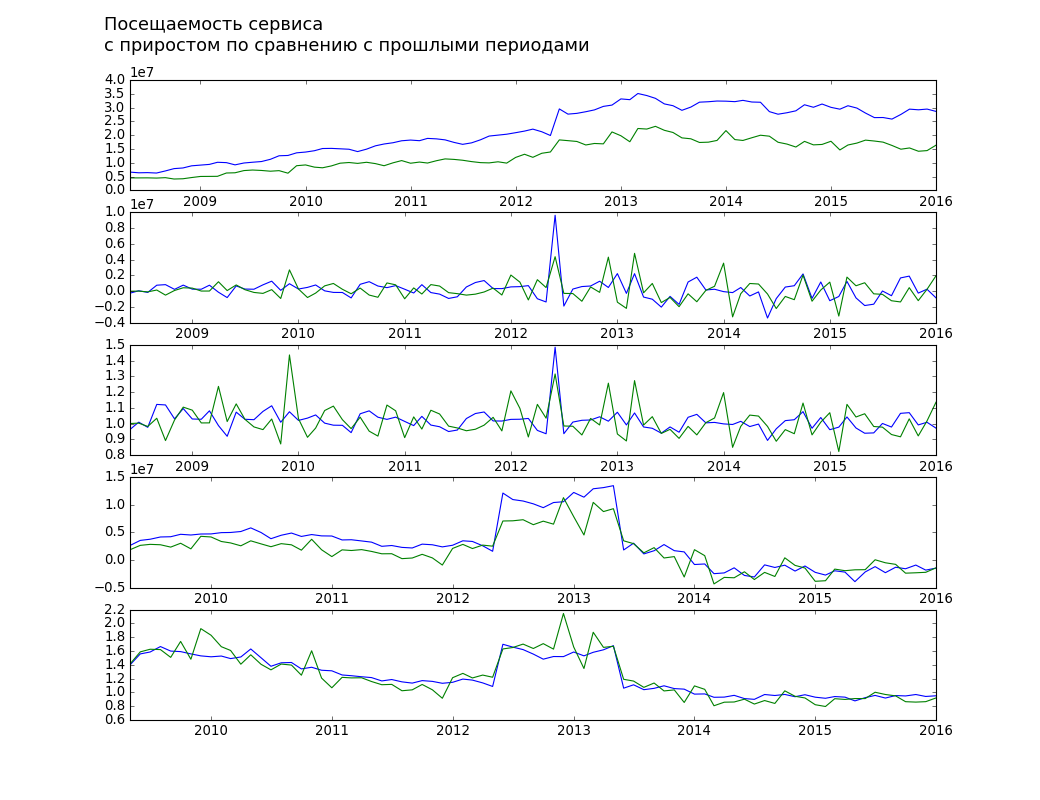

In [36]:
f = plt.figure(figsize=(13, 10), dpi=80)

graphs = [  'Monthly', 
            'Current-Previous-Diff', 
            'Current-Previous-%', 
            'Current-Prev-Year-Diff', 
            'Current-Prev-Year-%']

grid = matplotlib.gridspec.GridSpec(len(graphs),1)

plt.suptitle(u'Посещаемость сервиса \nс приростом по сравнению с прошлыми периодами', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=16)

for i in xrange(len(graphs)):    
    for j in xrange(len(df)):    
        ax = plt.subplot(grid[i, 0])
        ax.plot(df[j][[graphs[i]]])

In [37]:
df[i]['Monthly'][:5]

IndexError: list index out of range

<IPython.core.display.Javascript object>


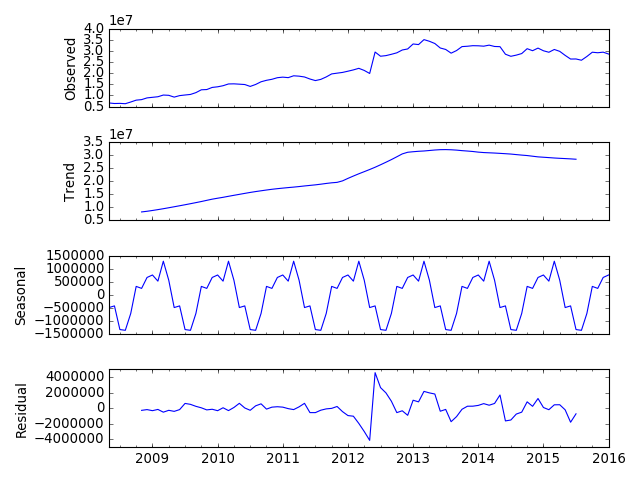

<IPython.core.display.Javascript object>


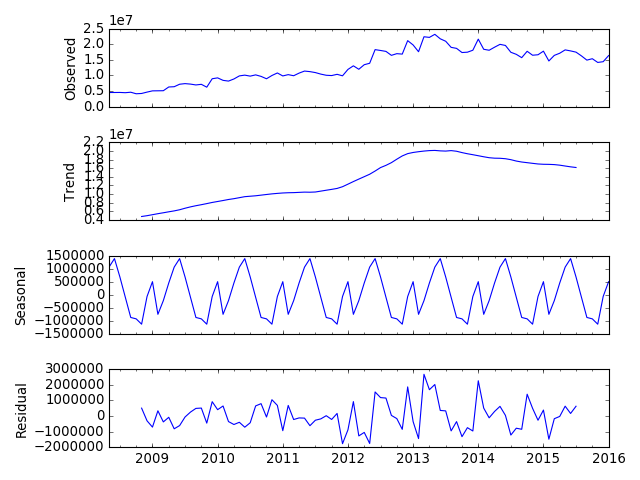

In [42]:
for i in xrange(len(df)):
    res = sm.tsa.seasonal_decompose(df[i]['Monthly'])
    res.plot()

In [ ]:
print df[0].columns.values


In [ ]:
def prev_diff_percent(a,b):
    return float(a) / b

df['Current-Previous-%'] = df.apply(lambda row: prev_diff_percent(row['Monthly'], row['Previous']), axis=1)

In [ ]:
f = plt.figure(figsize=(23, 10), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)


plt.suptitle(u'Посещаемость Погоды', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=36)
plt.plot(df2)


In [ ]:
dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()